# cifar image classification



In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#load dataset
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170500096/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [ ]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Text(0.5, 0, 'ship')

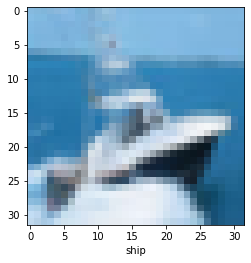

In [ ]:
plt.imshow(X_train[8])
plt.xlabel(classes[8])

In [ ]:
#Normalizing the data

X_train = X_train / 255.0
X_test = X_test / 255.0

#CNN Model Building

In [ ]:
model1 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=80, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=80, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(80, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [ ]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model1.fit(X_train, y_train, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 74s 47ms/step - loss: 1.4959 - accuracy: 0.4585
Epoch 2/15
1563/1563 [==============================] - 73s 47ms/step - loss: 1.1364 - accuracy: 0.6008
Epoch 3/15
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9908 - accuracy: 0.6544
Epoch 4/15
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8866 - accuracy: 0.6900
Epoch 5/15
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8073 - accuracy: 0.7184
Epoch 6/15
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7433 - accuracy: 0.7419
Epoch 7/15
1563/1563 [==============================] - 72s 46ms/step - loss: 0.6901 - accuracy: 0.7592
Epoch 8/15
1563/1563 [==============================] - 72s 46ms/step - loss: 0.6417 - accuracy: 0.7774
Epoch 9/15
1563/1563 [==============================] - 71s 46ms/step - loss: 0.5982 - accuracy: 0.7906
Epoch 10/15
1563/1563 [==============================] - 72s 46m

In [ ]:
model1.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4820 - accuracy: 0.6991


[1.4820088148117065, 0.6991000175476074]

In [ ]:
y_pred = model1.predict(X_test)
y_pred[:5]

array([[5.3683760e-08, 5.5512235e-08, 5.2384299e-04, 9.8084795e-01,
        6.5470034e-09, 1.7035473e-02, 1.5924543e-03, 9.0995735e-12,
        9.4850819e-08, 9.9576278e-11],
       [1.2719027e-02, 1.3837126e-02, 1.0431174e-15, 6.3604822e-14,
        5.6235393e-19, 1.8289733e-18, 5.2576959e-19, 4.4869673e-19,
        9.6844256e-01, 5.0013196e-03],
       [8.8059176e-03, 1.0100083e-02, 2.1458140e-05, 1.5793206e-05,
        1.2137164e-07, 1.2313680e-07, 1.6035386e-08, 6.5670861e-07,
        9.6319902e-01, 1.7856868e-02],
       [9.7690797e-01, 1.2001282e-08, 2.3082394e-02, 2.3248469e-07,
        5.1639216e-13, 2.8748543e-11, 1.2992417e-10, 2.4819747e-18,
        9.4795241e-06, 7.0267463e-09],
       [1.8868561e-13, 2.2926604e-10, 8.3187246e-07, 1.9236566e-07,
        3.9753746e-07, 7.2263262e-10, 9.9999845e-01, 6.5740272e-17,
        1.5306175e-07, 1.5261752e-14]], dtype=float32)

In [22]:
y_pred1 = [np.argmax(element) for element in y_pred]
y_pred1[:5]

[3, 8, 8, 0, 6]

In [23]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,classification_report
confusion_matrix(y_test,y_pred1)

array([[750,  17,  54,  24,  11,   6,  12,  16,  65,  45],
       [ 32, 813,  10,   7,   3,   9,   9,   7,  35,  75],
       [ 80,  10, 579,  59,  56,  89,  78,  22,  18,   9],
       [ 31,   8,  60, 490,  34, 236,  80,  26,  16,  19],
       [ 27,   5,  87,  69, 557,  85,  90,  61,  14,   5],
       [ 15,   9,  39, 126,  23, 709,  30,  34,   5,  10],
       [ 10,   9,  43,  52,  22,  44, 799,   5,  10,   6],
       [ 22,   5,  33,  48,  47, 121,   8, 693,   2,  21],
       [ 76,  19,  15,  13,   5,   5,   8,   4, 813,  42],
       [ 42,  77,  12,   9,   2,  12,  11,  24,  23, 788]])

In [24]:
accuracy_score(y_test,y_pred1)

0.6991

In [25]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72      1000
           1       0.84      0.81      0.82      1000
           2       0.62      0.58      0.60      1000
           3       0.55      0.49      0.52      1000
           4       0.73      0.56      0.63      1000
           5       0.54      0.71      0.61      1000
           6       0.71      0.80      0.75      1000
           7       0.78      0.69      0.73      1000
           8       0.81      0.81      0.81      1000
           9       0.77      0.79      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

